## Portfolio Allocation and Optimization: Monte Carlo Simulation and Optimization Algorithm

Uptil now we were focused more on analysing and forcasting Stock prices for Individual Stocks. A trader or a Hedge fund manager can optimize their Trading strategies based on the forcast Buy/Sell signal. 
We will now act as a Portfolio Manager and try to build a Trading Strategy using Sharpe Ratio and Optimization to demonstrate how a Portfolio can be optimized for higher gains. 

### Sharpe Ratio

The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment. 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os


%matplotlib inline


In [69]:
os.chdir(r'C:\Users\ashok\Desktop\SPPO\Streamlit Web App\Stock Data')

In [70]:
aapl = pd.read_csv('AAPL.csv')
#best features
features_selected = ['Date','Close(t)']
aapl = aapl[features_selected]
aapl = aapl.iloc[3500:-60, :]
aapl = aapl.rename(columns={'Close(t)':'Close'})
aapl = aapl.set_index('Date')
aapl

,Close
Date,
2019-09-13,216.60
2019-09-16,217.74
2019-09-17,218.53
2019-09-18,220.58
2019-09-19,218.79
...,...
2020-05-13,307.10
2020-05-14,308.98
2020-05-15,307.16


In [71]:
aapl.head()

,Close
Date,
2019-09-13,216.60
2019-09-16,217.74
2019-09-17,218.53
2019-09-18,220.58
2019-09-19,218.79


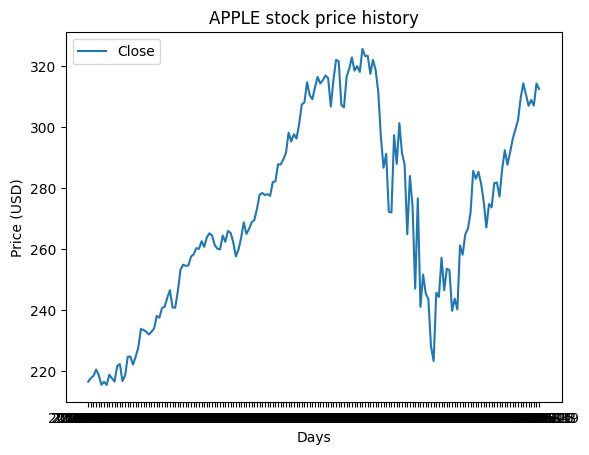

In [72]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(aapl["Close"])
plt.title('APPLE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Close'], loc='upper left')
plt.show()

### Lets get the Stock prices for 3 more stocks (Coka cola , Goldman Sachs and Johnsons & Johnsons) 

In [73]:
jpm = pd.read_csv('JPM.csv')
#best features
features_selected = ['Date','Close(t)']
jpm = jpm[features_selected]
jpm = jpm.iloc[3500:-60, :]
jpm = jpm.rename(columns={'Close(t)':'Close'})
jpm = jpm.set_index('Date')
jpm

,Close
Date,
2014-09-17,50.85
2014-09-18,51.70
2014-09-19,51.52
2014-09-22,51.35
2014-09-23,51.38
...,...
2020-05-13,83.22
2020-05-14,86.68
2020-05-15,85.07


In [74]:
ge = pd.read_csv('GE.csv')
#best features
features_selected = ['Date','Close(t)']
ge = ge[features_selected]
ge = ge.iloc[3500:-60, :]
ge = ge.rename(columns={'Close(t)':'Close'})
ge = ge.set_index('Date')
ge


msft = pd.read_csv('MSFT.csv')
#best features
features_selected = ['Date','Close(t)']
msft = msft[features_selected]
msft = msft.iloc[3500:-60, :]
msft = msft.rename(columns={'Close(t)':'Close'})
msft = msft.set_index('Date')
msft


jpm = pd.read_csv('JPM.csv')
#best features
features_selected = ['Date','Close(t)']
jpm = jpm[features_selected]
jpm = jpm.iloc[3500:-60, :]
jpm = jpm.rename(columns={'Close(t)':'Close'})
jpm = jpm.set_index('Date')

In [75]:
jpm.head()

,Close
Date,
2014-09-17,50.85
2014-09-18,51.70
2014-09-19,51.52
2014-09-22,51.35
2014-09-23,51.38


In [76]:
for stock_df in (aapl, jpm, ge, msft): 
    stock_df['Normed Return'] = stock_df['Close'] /stock_df.iloc[0]['Close']

### Normalized returns 

In [77]:
msft.head()

,Close,Normed Return
Date,,
2019-09-13,136.10,1.000000
2019-09-16,135.12,0.992799
2019-09-17,136.17,1.000514
2019-09-18,137.29,1.008744
2019-09-19,139.82,1.027333


In [78]:
jpm.head()

,Close,Normed Return
Date,,
2014-09-17,50.85,1.000000
2014-09-18,51.70,1.016716
2014-09-19,51.52,1.013176
2014-09-22,51.35,1.009833
2014-09-23,51.38,1.010423


### Portfolio Allocation

Let take the starting Portfolio Allocations consisting of these 4 stocks as - 

- 25% in AAPL
- 10% in JPM
- 30% in MSFT
- 35% in GE

In [79]:
for stock_df, allo in zip((aapl, jpm, msft, ge),[.25,.1,.3,.35]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [80]:
aapl.head()

,Close,Normed Return,Allocation
Date,,,
2019-09-13,216.60,1.000000,0.250000
2019-09-16,217.74,1.005263,0.251316
2019-09-17,218.53,1.008910,0.252228
2019-09-18,220.58,1.018375,0.254594
2019-09-19,218.79,1.010111,0.252528


 Assuming the starting portfolio Position of 1 million $, lets look at how the value of our position changes in each stock

In [81]:
# value of each position
for stock_df in (aapl, jpm, msft, ge):
    stock_df['Position Value'] = stock_df['Allocation']*1000000

In [82]:
ge.head(10)

,Close,Normed Return,Allocation,Position Value
Date,,,,
2014-09-17,21.28,1.000000,0.350000,350000.000000
2014-09-18,21.41,1.006109,0.352138,352138.157895
2014-09-19,21.48,1.009398,0.353289,353289.473684
2014-09-22,21.31,1.001410,0.350493,350493.421053
2014-09-23,21.26,0.999060,0.349671,349671.052632
2014-09-24,21.18,0.995301,0.348355,348355.263158
2014-09-25,20.87,0.980733,0.343257,343256.578947
2014-09-26,20.94,0.984023,0.344408,344407.894737
2014-09-29,20.77,0.976034,0.341612,341611.842105


You can see how the value in increasing. Lets create a single dataframe for all of the 4 stocks

In [83]:
# create list of all position values
all_pos_vals = [aapl['Position Value'], jpm['Position Value'], msft['Position Value'], ge['Position Value']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['AAPL', 'JPM', 'MSFT','GE']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)

In [84]:
portfolio_val.head(10)

,AAPL,JPM,MSFT,GE,Total
Date,,,,,
2019-09-13,250000.000000,228436.578171,300000.000000,153125.000000,931561.578171
2019-09-16,251315.789474,226411.012783,297839.823659,153782.894737,929349.520652
2019-09-17,252227.608495,225290.068830,300154.298310,153453.947368,931125.923003
2019-09-18,254593.721145,227551.622419,302623.071271,153782.894737,938551.309572
2019-09-19,252527.700831,226823.992134,308199.853049,154440.789474,941992.335488
2019-09-20,248834.256694,225919.370698,304628.949302,153618.421053,933000.997747
2019-09-23,249965.373961,225880.039331,303989.713446,153125.000000,932960.126739
2019-09-24,248776.546630,222930.186824,300132.255694,147039.473684,918878.462832
2019-09-25,252608.494922,224208.456244,304452.608376,150164.473684,931434.033226


### we can see day-by-day how our positions and portfolio value is changing.

<Axes: xlabel='Date'>

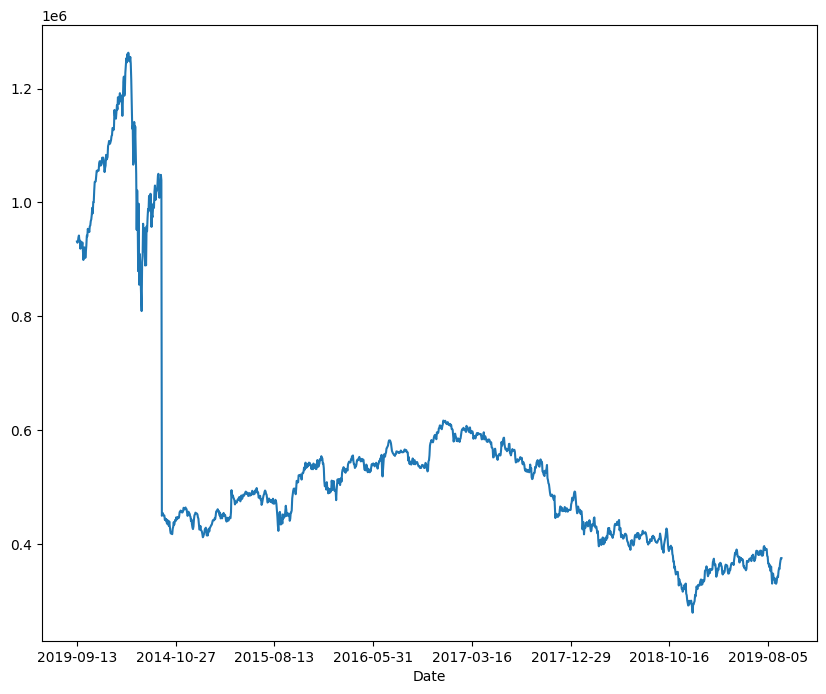

In [85]:
# plot our portfolio
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total'].plot(figsize=(10,8))

### We have made 150k for the year

Lets also look at individual contributions of each stock in our portfolio

<Axes: xlabel='Date'>

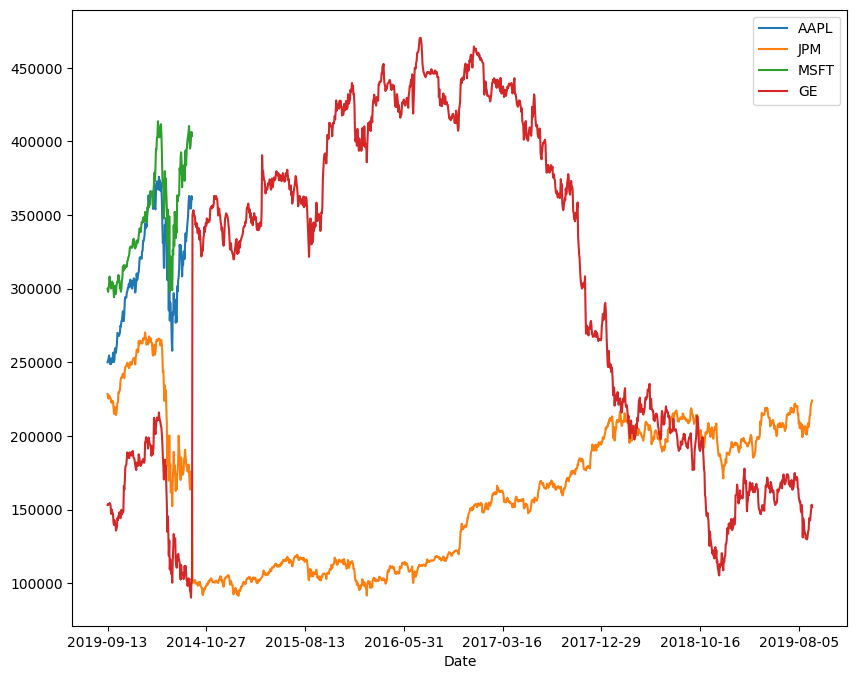

In [86]:
portfolio_val.drop('Total',axis=1).plot(figsize=(10,8))

### Let's move towards implementing MCMC and Optimization

In [87]:
# Daily Return
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

<Axes: ylabel='Frequency'>

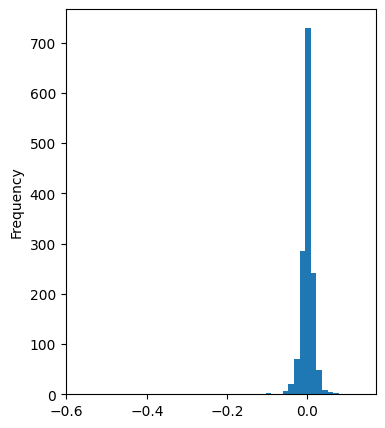

In [88]:
# average daily return
portfolio_val['Daily Return'].mean()

# standard deviation
portfolio_val['Daily Return'].std()

# plot histogram of daily returns
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

Calculating the total portfolio return 

In [89]:
# cumulative portfolio return
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)
cum_return

C:\Users\ashok\AppData\Local\Temp\ipykernel_27056\691628946.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)


-59.672424159756375

### Calculate Sharpe Ratio

The Sharpe Ratio is the mean (portfolio return - the risk free rate) % standard deviation.

In [90]:
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
ASR = (252**0.5) * sharpe_ratio
ASR

-0.23745472999681583

Annualized Share Ratio is 0.79

### Optimization using Monte Carlo Simulation

We will check a bunch of random allocations and analyse which one has the best Sharpe Ratio.
#### This process of randomly guessing is known as a Monte Carlo Simulation.

We will randomly assign weights to our stocks in the portfolio using mcmc and then calculate the average daily return & SD (Standard deviation) of return. Then we can calculate the Sharpe Ratio for many randomly selected allocations. 

We will further use Optimzation Algorithm to minimize for this. 

Minimization is a similar concept to optimization - let's say we have a simple equation y = x2 - the idea is we're trying to figure out what value of x will minimize y, in this example 0.

This idea of a minimizer will allow us to build an optimizer.

In [91]:
# concatenate them and rename the columns
stocks = pd.concat([aapl.Close, jpm.Close, ge.Close, msft.Close], axis=1)
stocks.columns = ['AAPL', 'JPM', 'GE', 'MSFT']
stocks

,AAPL,JPM,GE,MSFT
Date,,,,
2019-09-13,216.60,116.16,9.31,136.10
2019-09-16,217.74,115.13,9.35,135.12
2019-09-17,218.53,114.56,9.33,136.17
2019-09-18,220.58,115.71,9.35,137.29
2019-09-19,218.79,115.34,9.39,139.82
...,...,...,...,...
2019-09-06,NaN,108.80,8.67,NaN
2019-09-09,NaN,111.50,8.92,NaN
2019-09-10,NaN,112.92,9.10,NaN


In [92]:
stocks.pct_change(1).mean()

C:\Users\ashok\AppData\Local\Temp\ipykernel_27056\115677780.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks.pct_change(1).mean()


AAPL    0.000306
JPM     0.000227
GE      0.001079
MSFT    0.000259
dtype: float64

In [93]:
stocks.pct_change(1).head()

C:\Users\ashok\AppData\Local\Temp\ipykernel_27056\3073985594.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks.pct_change(1).head()


,AAPL,JPM,GE,MSFT
Date,,,,
2019-09-13,NaN,NaN,NaN,NaN
2019-09-16,0.005263,-0.008867,0.004296,-0.007201
2019-09-17,0.003628,-0.004951,-0.002139,0.007771
2019-09-18,0.009381,0.010038,0.002144,0.008225
2019-09-19,-0.008115,-0.003198,0.004278,0.018428


In [94]:
# log daily return
log_return = np.log(stocks/stocks.shift(1))
log_return.head()

,AAPL,JPM,GE,MSFT
Date,,,,
2019-09-13,NaN,NaN,NaN,NaN
2019-09-16,0.005249,-0.008907,0.004287,-0.007227
2019-09-17,0.003622,-0.004963,-0.002141,0.007741
2019-09-18,0.009337,0.009988,0.002141,0.008191
2019-09-19,-0.008148,-0.003203,0.004269,0.018260


In [95]:
print(stocks.columns)

weights = np.array(np.random.random(4))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['AAPL', 'JPM', 'GE', 'MSFT'], dtype='object')
Random Weights:
[0.11960235 0.11478336 0.41668646 0.29362039]
Rebalance
[0.12660452 0.1215034  0.44108156 0.31081052]


In [96]:
# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Expected Portfolio Return
0.20318594906009524
Expected Volatility
0.45479452827489053
Sharpe Ratio
0.4467642779934326


Now we will repeat the above process over 1000 times 

In [97]:
num_ports = 8000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(4)) 
    weights = weights/np.sum(weights)  
    # save the weights
    all_weights[ind,:] = weights
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [98]:
sharpe_arr.max()

1.117809991874103

If we then get the location of the maximum Sharpe Ratio and then get the allocation for that index. This shows us the optimal allocation out of the 8000 random allocations:

In [99]:
sharpe_arr.argmax()

3906

In [100]:
all_weights[7098, :]

array([0.21169626, 0.07688625, 0.22036948, 0.491048  ])

These are the best allocations we have received using MCMC. Lets compare how we did from the original Allocation

Original Allocation - 

- 25% in AAPL
- 10% in JPM
- 30% in MSFT
- 35% in GE

MCMC Allocation - 

- 25% in AAPL
- 10% in JPM
- 35% in MSFT
- 30% IN GE


### Initial Allocation

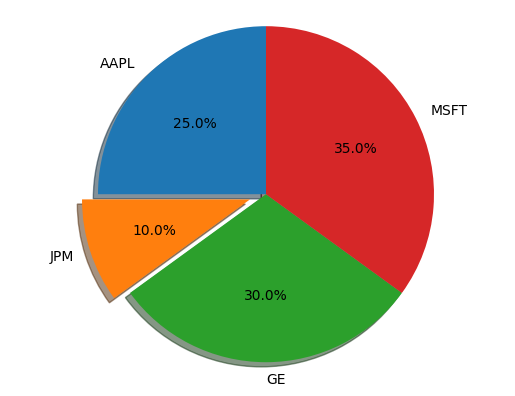

In [111]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AAPL', 'JPM', 'GE', 'MSFT'
sizes = [25, 10, 30, 35]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### After  Markov Chain Monte Carlo (MCMC) 

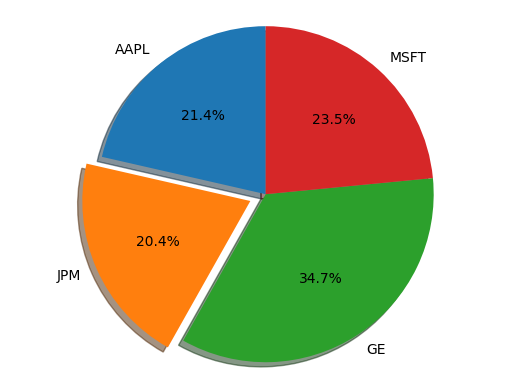

In [112]:
import matplotlib.pyplot as plt
labels = 'AAPL', 'JPM', 'GE', 'MSFT'
sizes = [21, 20, 34, 23]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Portfolio Optimization: Optimization Algorithm
Let's now move on from random allocations to a mathematical optimization algorithm.

All of the heavy lifting for this optimization will be done with SciPy, so we just have to do a few things to set up the optimization function.

In [113]:
from scipy.optimize import minimize

def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return .cov()*252,weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])


# minimize negative Sharpe Ratio
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

# check allocation sums to 1
def check_sum(weights): 
    return np.sum(weights) - 1

In [114]:
# create constraint variable
cons = ({'type':'eq','fun':check_sum})

In [115]:
# create weight boundaries
bounds = ((0,1),(0,1),(0,1),(0,1))

In [116]:
# initial guess
init_guess = [0.25, 0.25, 0.25, 0.25]

First we call minimize and pass in what we're trying to minimize - negative Sharpe, our initial guess, we set the minimization method to SLSQP, and we set our bounds and constraints:

In [117]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [118]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.190400913478738
       x: [ 1.000e+00  4.531e-15  4.927e-16  0.000e+00]
     nit: 4
     jac: [-0.000e+00  1.136e+00  1.141e+00  1.307e-01]
    nfev: 20
    njev: 4

In [119]:
opt_results.x

array([1.00000000e+00, 4.53109772e-15, 4.92661467e-16, 0.00000000e+00])

In [120]:
get_ret_vol_sr(opt_results.x)

array([0.54055931, 0.45409853, 1.19040091])

The Optimal results of the Optimization algorithm are 1.190

### Conclusion 

We have implemented Monte carlo Simulation technique to randomly take a sample and simulate it to find the best sharpe ratio for a given portfolio. 
Then we moved to a better appraoch using Optimization Algorithm by Minimize function in Spicy library. 

We get around same Sharpe ratio for both which improves on the initial portfolio allocation we started off with. 

We can form more trading strategies based on other methods too like Pairs trading, Butterfly spread, Bull-bear spread etc. But we just wanted to implement a Trading strategy and see how we can optimize a portfolio. 